### Decision Tree Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##### Load the SQL db for later comparison

In [2]:
import sqlite3
conn=sqlite3.connect("parametres.db")
cur=conn.cursor()

##### Load the database sampled at a 25% where all attributes are standardized

In [3]:
df=pd.read_csv('delayed25.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df=df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484190 entries, 0 to 484189
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ActualElapsedTime  484190 non-null  float64
 1   AirTime            484190 non-null  float64
 2   ArrDelay           484190 non-null  int64  
 3   DepDelay           484190 non-null  float64
 4   Distance           484190 non-null  float64
 5   TaxiIn             484190 non-null  float64
 6   TaxiOut            484190 non-null  float64
 7   Cancelled          484190 non-null  float64
 8   Diverted           484190 non-null  int64  
 9   CarrierDelay       484190 non-null  float64
 10  WeatherDelay       484190 non-null  float64
 11  NASDelay           484190 non-null  float64
 12  SecurityDelay      484190 non-null  float64
 13  LateAircraftDelay  484190 non-null  float64
 14  DepTime_sin        484190 non-null  float64
 15  DepTime_cos        484190 non-null  float64
 16  Mo

In [5]:
df.head()

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,...,LateAircraftDelay,DepTime_sin,DepTime_cos,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos,origin_freq,dest,carrier_me
0,0.113113,0.078078,9,-0.439024,-0.572727,0.413914,0.696697,0.0,0,0.0,...,0.000000,-0.886204,-0.463296,0.866025,-5.000000e-01,0.781831,0.623490,0.049265,0.000388,45.295058
1,0.999195,0.999343,16,-0.243902,5.903030,0.853854,0.416416,0.0,0,0.0,...,0.777778,-0.777146,-0.629320,0.866025,-5.000000e-01,0.000000,1.000000,0.004474,0.055194,39.881507
2,0.462963,0.427427,60,0.243902,-0.416667,0.986987,0.024525,0.0,0,0.0,...,0.000000,-0.877565,-0.479458,0.500000,8.660254e-01,-0.433884,-0.900969,0.000312,0.055194,47.554255
3,0.734735,0.735736,56,1.317073,0.515152,0.250250,0.795796,0.0,0,0.3,...,2.944444,-0.931691,-0.363251,1.000000,6.123234e-17,-0.781831,0.623490,0.027327,0.008068,50.181217
4,0.680180,0.735736,-15,-0.365854,0.527273,0.413914,0.222222,0.0,0,0.0,...,0.000000,-0.994792,0.101924,-0.500000,8.660254e-01,0.781831,0.623490,0.030346,0.016289,36.060882


In [6]:
from sklearn.model_selection import train_test_split
X,y = df.loc[:, df.columns != 'ArrDelay'],df.loc[:, df.columns == 'ArrDelay']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


##### Use Decision Tree Regressor 

In [7]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train,)

##### Check the parameters to verify the accurancy of the model

In [8]:
y_pred = model.predict(X_test)

model.fit(X,y)
print("R-Squared on train dataset={}".format(model.score(X_test,y_test)))
r2=model.score(X_test,y_test)

model.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(model.score(X_test,y_test)))

mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % (mse*(1/2.0)))

mae=mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

R-Squared on train dataset=0.9763829939005182
R-Squared on test dataset=0.9775841168761702
MSE: 79.421
RMSE: 39.710
MAE: 5.913


##### Update the SQL database

In [9]:
code='dt1'
process='Decision_Tree'
datab='standard'
depdelay='yes'

cur.execute("INSERT OR REPLACE INTO parametres(codi,proces,DepDelay, base_dades, MAE, R2, MSE) VALUES(?,?,?,?,?,?,?)",(code,process,depdelay,datab,'%.3f' % mae,'%.3f' % r2,'%.3f' % mse))
conn.commit()

##### busquem l'òptima combinació de paràmetres (fet amb kaggle)

In [9]:
#  from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
#  param_grid = {"min_samples_split": [10, 20, 40],
#                "max_depth": [6, 8],
#                "min_samples_leaf": [20, 40],
#                "max_leaf_nodes": [5, 20],
#                }

#  grid_cv_model = GridSearchCV(model, param_grid, cv=5)
#  grid_cv_model.fit(X,y)

In [10]:
#  print("R-Squared::{}".format(grid_cv_dtm.best_score_))
#  print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.9368601370189816
Best Hyperparameters::
{'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}

In [10]:
X,y = df.loc[:, df.columns != 'ArrDelay'],df.loc[:, df.columns == 'ArrDelay']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model1 = DecisionTreeRegressor(min_samples_split=10,max_depth=6,min_samples_leaf=20,
                               max_leaf_nodes=20).fit(X_train, y_train,)

In [11]:
model1.fit(X,y)
print("R-Squared on train dataset={}".format(model1.score(X_test,y_test)))

model1.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(model1.score(X_test,y_test)))

R-Squared on train dataset=0.9360387480770306
R-Squared on test dataset=0.9376462304341682


Profundidad del árbol: 5
Número de nodos terminales: 20


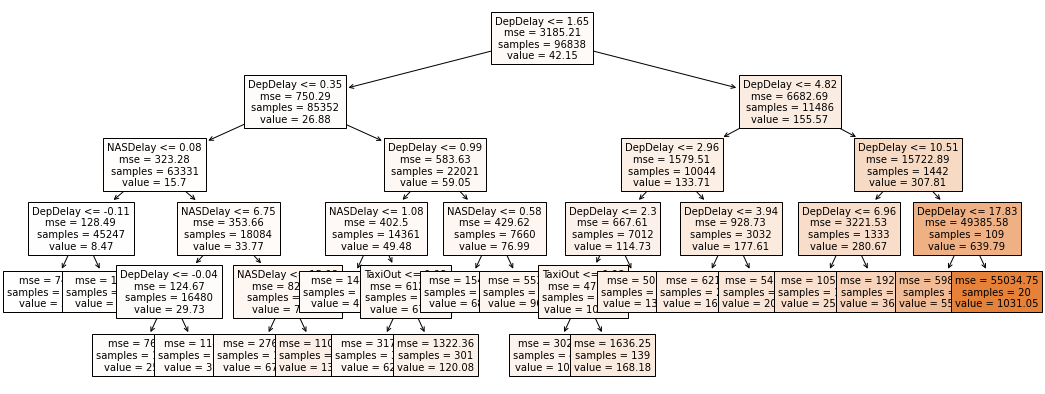

In [12]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18, 7))

print(f"Profundidad del árbol: {model1.get_depth()}")
print(f"Número de nodos terminales: {model1.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model1,
            feature_names = df.drop(columns = "ArrDelay").columns,
            class_names   = 'ArrDelay',
            filled        = True,
            impurity      = True,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [13]:
importancia = pd.DataFrame({'attribute': df.drop(columns = "ArrDelay").columns,
                             'rank': model1.feature_importances_})

importancia.sort_values('rank', ascending=False)

,attribute,rank
2,DepDelay,0.944054
10,NASDelay,0.050760
5,TaxiOut,0.005186
0,ActualElapsedTime,0.000000
13,DepTime_sin,0.000000
20,dest,0.000000
19,origin_freq,0.000000
18,DayOfWeek_cos,0.000000
17,DayOfWeek_sin,0.000000
16,Month_cos,0.000000


In [14]:
y_pred = model1.predict(X_test)

model1.fit(X,y)
print("R-Squared on train dataset={}".format(model1.score(X_test,y_test)))
r2=model1.score(X_test,y_test)

model1.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(model1.score(X_test,y_test)))

mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % (mse*(1/2.0)))

mae=mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

code='dt2'
process='Decision_Tree'
datab='standard'
depdelay='yes'

cur.execute("INSERT OR REPLACE INTO parametres(codi,proces,DepDelay, base_dades, MAE, R2, MSE) VALUES(?,?,?,?,?,?,?)",(code,process,depdelay,datab,'%.3f' % mae,'%.3f' % r2,'%.3f' % mse))
conn.commit()

R-Squared on train dataset=0.9360387480770306
R-Squared on test dataset=0.9376462304341682
MSE: 198.610
RMSE: 99.305
MAE: 9.374


##### Delete the attribute Departure Delay

In [15]:
dfdel=df.drop(['DepDelay'], axis=1)

In [16]:
X,y = dfdel.loc[:, dfdel.columns != 'ArrDelay'],dfdel.loc[:, dfdel.columns == 'ArrDelay']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


model1 = DecisionTreeRegressor(min_samples_split=10,max_depth=6,min_samples_leaf=20,
                               max_leaf_nodes=20).fit(X_train, y_train,)

model1.fit(X,y)
print("R-Squared on train dataset={}".format(model1.score(X_test,y_test)))

model1.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(model1.score(X_test,y_test)))

y_pred = model1.predict(X_test)

model1.fit(X,y)
print("R-Squared on train dataset={}".format(model1.score(X_test,y_test)))
r2=model1.score(X_test,y_test)

model1.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(model1.score(X_test,y_test)))

mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % (mse*(1/2.0)))

mae=mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

code='dt3'
process='Decision_Tree'
datab='standard'
depdelay='no'

cur.execute("INSERT OR REPLACE INTO parametres(codi,proces,DepDelay, base_dades, MAE, R2, MSE) VALUES(?,?,?,?,?,?,?)",(code,process,depdelay,datab,'%.3f' % mae,'%.3f' % r2,'%.3f' % mse))
conn.commit()

R-Squared on train dataset=0.8306698777131392
R-Squared on test dataset=0.8375192046807258
R-Squared on train dataset=0.8306698777131392
R-Squared on test dataset=0.8375192046807258
MSE: 517.535
RMSE: 258.768
MAE: 14.571




##### Eliminem les columnes que sembla no tenen influència en les prediccions

In [17]:
dfmin=df[['DepDelay','NASDelay','TaxiOut','ArrDelay']]
dfmin.head(3)

,DepDelay,NASDelay,TaxiOut,ArrDelay
0,-0.439024,0.000000,0.696697,9
1,-0.243902,0.333333,0.416416,16
2,0.243902,4.333333,0.024525,60


In [18]:
X,y = dfmin.loc[:, dfmin.columns != 'ArrDelay'],dfmin.loc[:, dfmin.columns == 'ArrDelay']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(min_samples_split=10,max_depth=6,min_samples_leaf=20,
                               max_leaf_nodes=20).fit(X_train, y_train,)

model.fit(X,y)
print("R-Squared on train dataset={}".format(model.score(X_test,y_test)))

model.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(model.score(X_test,y_test)))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % (mse*(1/2.0)))

mae=mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

code='dt4'
process='Decision_Tree'
datab='standard/min'
depdelay='yes'

cur.execute("INSERT OR REPLACE INTO parametres(codi,proces,DepDelay, base_dades, MAE, R2, MSE) VALUES(?,?,?,?,?,?,?)",(code,process,depdelay,datab,'%.3f' % mae,'%.3f' % r2,'%.3f' % mse))
conn.commit()

R-Squared on train dataset=0.9360387480770306
R-Squared on test dataset=0.9376462304341682
MSE: 198.610
RMSE: 99.305
MAE: 9.374






##### Try the same model with a non standaried database

In [19]:
df=pd.read_csv('delays_no25.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,Month,DayOfWeek,DepTime,ArrTime,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,...,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,origin_freq,dest,carrier_me
0,7,1,1851.0,151.0,240,204,7.0,8.0,1671,19.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.028770,0.017956,36.445019
1,2,5,1036.0,1142.0,66,33,83.0,73.0,130,6.0,...,0,0,0.0,0.0,83.0,0.0,0.0,0.000606,0.056271,45.370587
2,12,5,1842.0,2238.0,356,332,48.0,37.0,2556,5.0,...,0,0,23.0,0.0,11.0,0.0,14.0,0.030346,0.005212,39.881507
3,12,7,1635.0,1702.0,87,42,47.0,25.0,256,4.0,...,0,0,25.0,0.0,22.0,0.0,0.0,0.028770,0.025227,30.087884
4,12,3,1532.0,1641.0,69,55,36.0,42.0,377,3.0,...,0,0,0.0,0.0,0.0,0.0,36.0,0.015856,0.003103,30.087884


In [20]:
X,y = df.loc[:, df.columns != 'ArrDelay'],df.loc[:, df.columns == 'ArrDelay']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(min_samples_split=10,max_depth=6,min_samples_leaf=20,
                               max_leaf_nodes=20).fit(X_train, y_train,)

model.fit(X,y)
print("R-Squared on train dataset={}".format(model.score(X_test,y_test)))

model.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(model.score(X_test,y_test)))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % (mse*(1/2.0)))

mae=mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

code='dt5'
process='Decision_Tree'
datab='no standard'
depdelay='yes'

cur.execute("INSERT OR REPLACE INTO parametres(codi,proces,DepDelay, base_dades, MAE, R2, MSE) VALUES(?,?,?,?,?,?,?)",(code,process,depdelay,datab,'%.3f' % mae,'%.3f' % r2,'%.3f' % mse))
conn.commit()

R-Squared on train dataset=0.9268239887743983
R-Squared on test dataset=0.9288356548121978
MSE: 227.035
RMSE: 113.517
MAE: 9.818




##### Delete Departure Delay

In [21]:
dfdel=df.drop(['DepDelay'], axis=1)

In [22]:
X,y = dfdel.loc[:, dfdel.columns != 'ArrDelay'],dfdel.loc[:, dfdel.columns == 'ArrDelay']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(min_samples_split=10,max_depth=6,min_samples_leaf=20,
                               max_leaf_nodes=20).fit(X_train, y_train,)

model.fit(X,y)
print("R-Squared on train dataset={}".format(model.score(X_test,y_test)))

model.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(model.score(X_test,y_test)))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % (mse*(1/2.0)))

mae=mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

code='dt6'
process='Decision_Tree'
datab='no standard'
depdelay='no'

cur.execute("INSERT OR REPLACE INTO parametres(codi,proces,DepDelay, base_dades, MAE, R2, MSE) VALUES(?,?,?,?,?,?,?)",(code,process,depdelay,datab,'%.3f' % mae,'%.3f' % r2,'%.3f' % mse))
conn.commit()

R-Squared on train dataset=0.8445624030896794
R-Squared on test dataset=0.8452424438135118
MSE: 493.721
RMSE: 246.861
MAE: 14.717


##### Check the SQL dataset (or delete it if needed)

In [23]:
#cur.execute('''DELETE FROM parametres''')
#conn.commit()
print(pd.read_sql_query("SELECT * from parametres", conn))

         codi          proces DepDelay    base_dades     MAE     R2       MSE
0         nn1  Neural_network      yes      standard   2.295  0.995    16.489
1         nn2  Neural_network       no      standard   2.822  0.989    35.978
2         ls1           Lasso      yes      standard   3.548  0.987    44.190
3         ls2           Lasso       no      standard   3.548  0.987    44.190
4   objective  Neural_network       no  objective_dt  35.110  0.129  2828.555
5         dt1   Decision_Tree      yes      standard   5.913  0.976    79.421
6         dt2   Decision_Tree      yes      standard   9.374  0.936   198.610
7         dt3   Decision_Tree       no      standard  14.571  0.831   517.535
8         dt4   Decision_Tree      yes  standard/min   9.374  0.831   198.610
9         dt5   Decision_Tree      yes   no standard   9.818  0.831   227.035
10        dt6   Decision_Tree       no   no standard  14.717  0.831   493.721
